# ML House Price Prediction

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']
boston = pd.read_csv('./boston_housing.csv', header=None, delimiter=r"\s+", names=column_names)

### Data info

In [4]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Summarizing the Stats of the Data

In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Check the missing values

In [7]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

<Axes: >

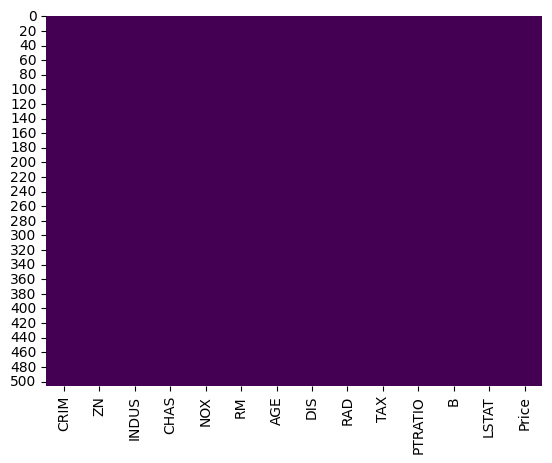

In [8]:
sns.heatmap(boston.isnull(), cbar=False, cmap='viridis')

Here, we see that there is no missing value in the dataset

## Exploratory Data Analysis

### Correlation Matrix
The correlation matrix below shows the linear relationship between each pair of features in the dataset. Values close to 1 or -1 indicate strong positive or negative correlations, respectively. This helps identify which features are most related to the target variable and can reveal multicollinearity among predictors.

<Axes: >

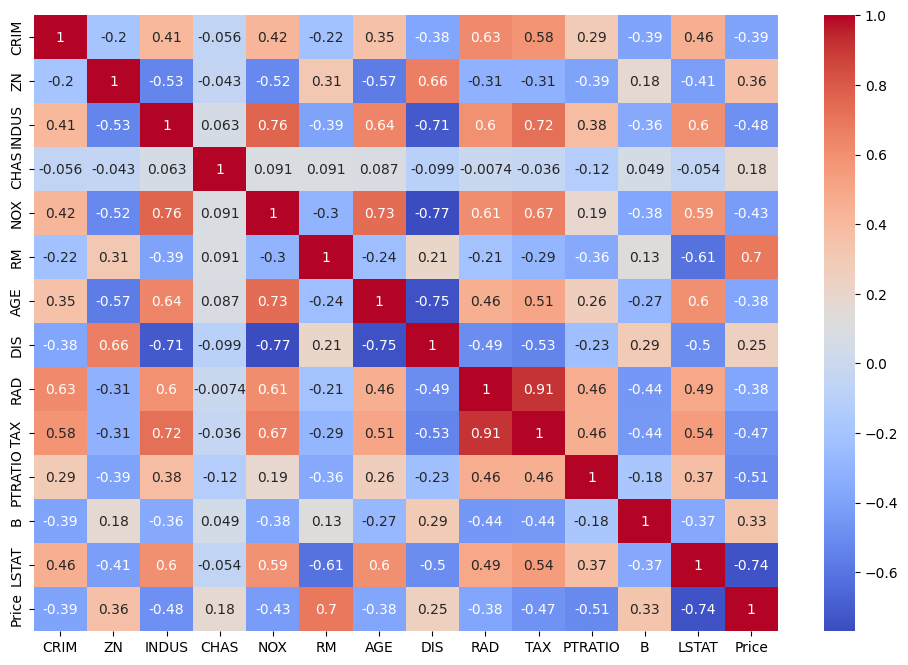

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm')

### Graph
Each graph below visualizes the relationship between a specific feature and the target variable (house price). These plots help to understand how each feature individually impacts house prices and can guide feature selection for modeling.

Lets, look the at some diagrams for analysis

Text(0.5, 1.0, 'Scatter plot between Price and Crime Rate')

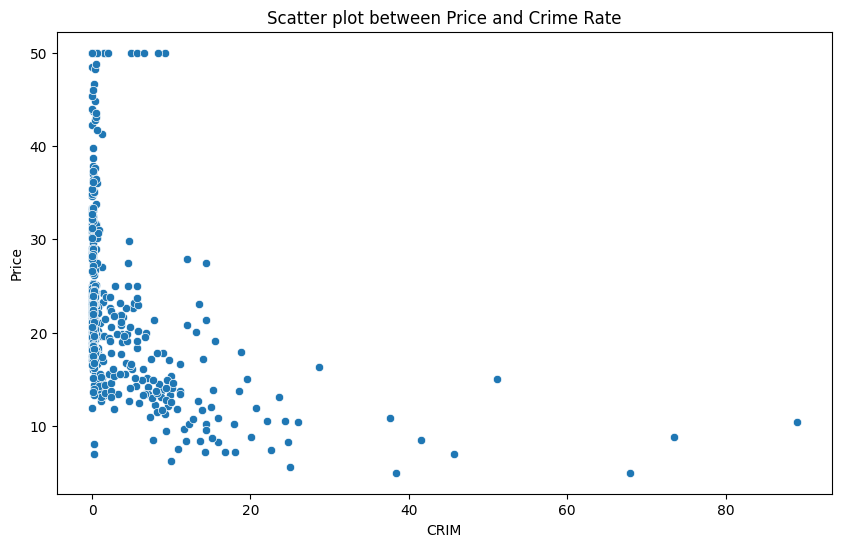

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=boston, x='CRIM', y='Price')
plt.title('Scatter plot between Price and Crime Rate')

#### Price vs Crime Rate
This scatter plot shows the relationship between house prices and the crime rate (CRIM) in each area. Generally, higher crime rates are associated with lower house prices, indicating a negative correlation.


Text(0.5, 1.0, 'Scatter plot between Price and Average Rooms Per Dwelling')

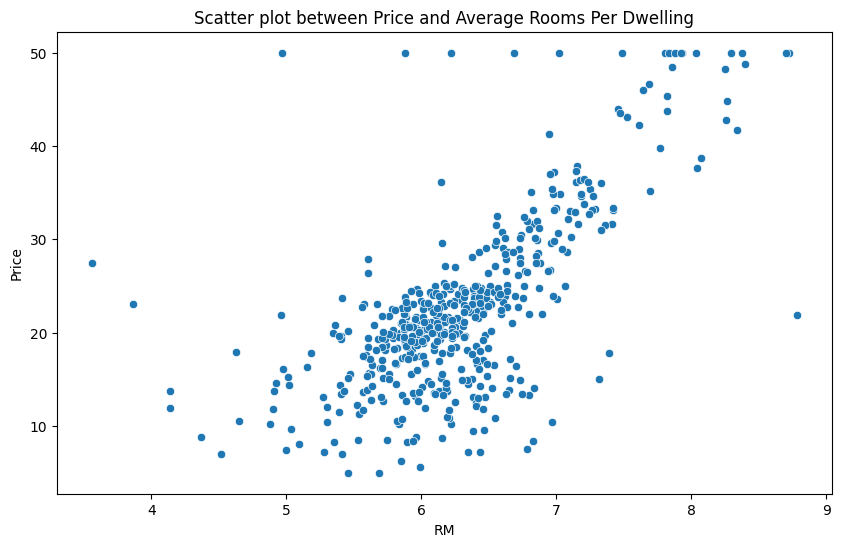

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=boston, x='RM', y='Price')
plt.title('Scatter plot between Price and Average Rooms Per Dwelling')

#### Price vs Average Rooms Per Dwelling (RM)
This scatter plot illustrates the relationship between house prices and the average number of rooms per dwelling. Higher values of RM generally correspond to higher house prices, showing a positive correlation.

Text(0.5, 1.0, 'Regression line between Price and Average Rooms per Dwelling')

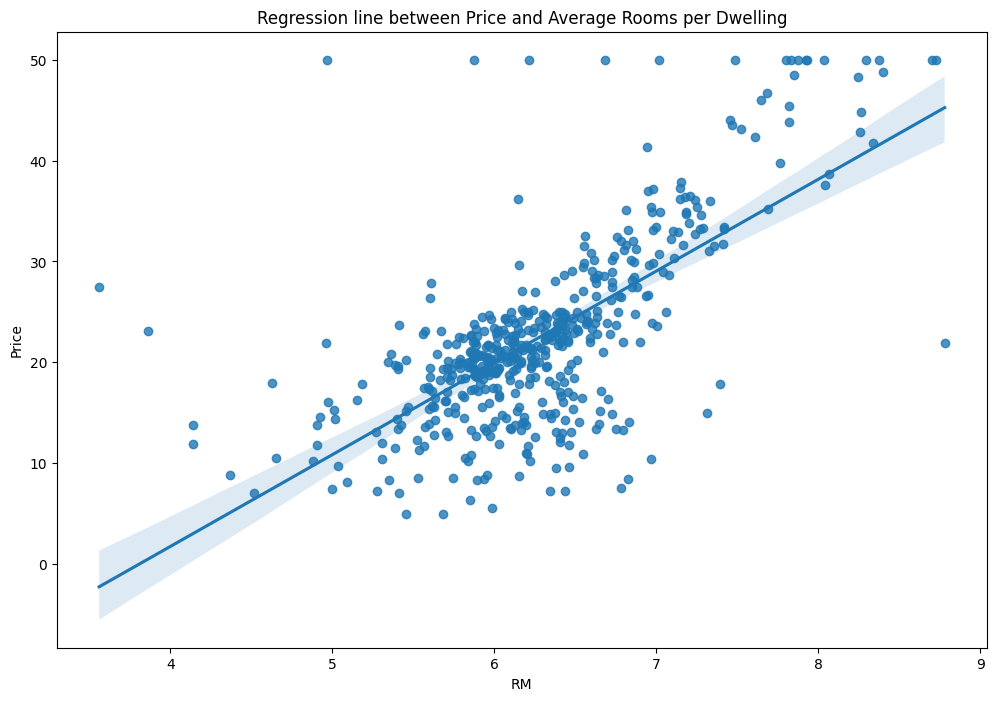

In [12]:
plt.figure(figsize=(12,8))
sns.regplot(data=boston, x='RM', y='Price')
plt.title("Regression line between Price and Average Rooms per Dwelling")

#### Regression Line - Price vs Average Rooms Per Dwelling (RM)
This regression plot shows the linear relationship between house prices and the average number of rooms per dwelling. The regression line highlights the positive correlation, indicating that more rooms typically lead to higher house prices.

Text(0.5, 1.0, 'Regression line between Price and Lower Status of the Population')

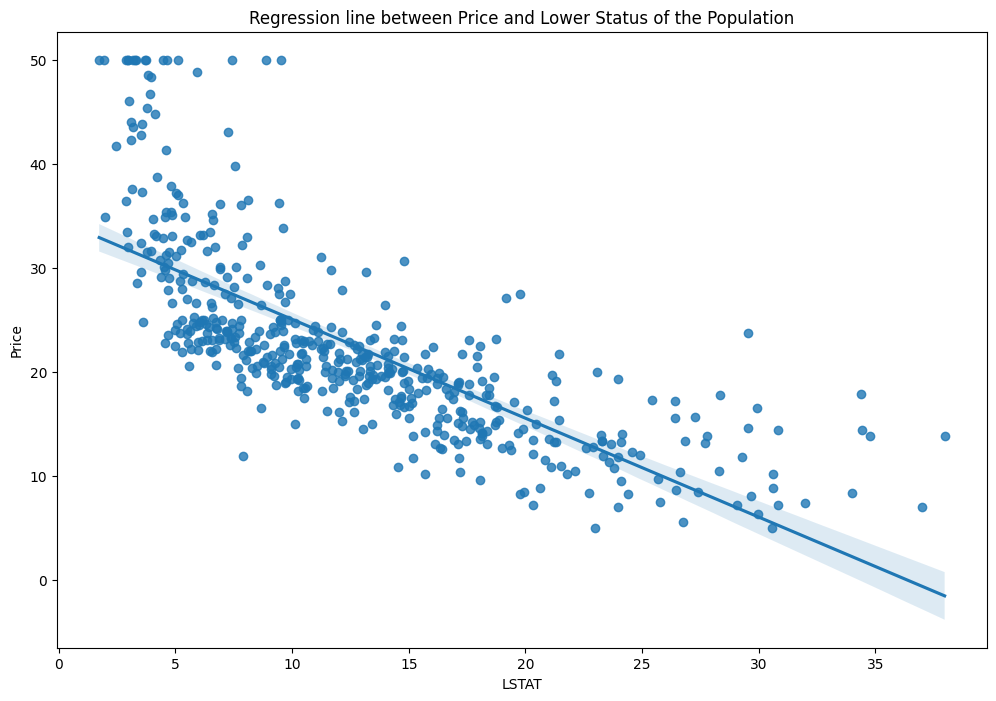

In [13]:
plt.figure(figsize=(12,8))
sns.regplot(data=boston, x='LSTAT', y='Price')
plt.title("Regression line between Price and Lower Status of the Population")

#### Regression Line - Price vs Lower Status of the Population (LSTAT)
This regression plot shows the relationship between house prices and the percentage of lower status population (LSTAT). There is a strong negative correlation, meaning that as the percentage of lower status population increases, house prices tend to decrease.

Text(0.5, 1.0, 'Regression line between Price and Charles River Dummy Variable')

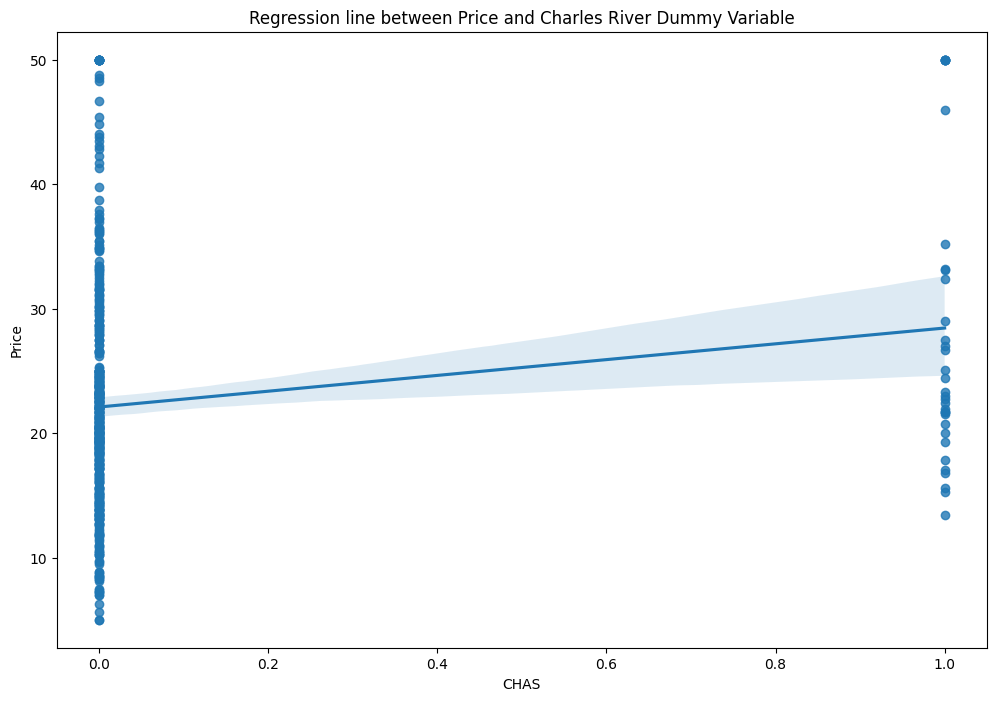

In [14]:
plt.figure(figsize=(12,8))
sns.regplot(data=boston, x='CHAS', y='Price')
plt.title("Regression line between Price and Charles River Dummy Variable")

#### Regression Line - Price vs Charles River Dummy Variable (CHAS)
This regression plot shows the relationship between house prices and the Charles River dummy variable (CHAS), which indicates whether a tract bounds the river. The plot helps to visualize if proximity to the river has any significant effect on house prices.

Text(0.5, 1.0, 'Regression line between Price and Pupil-Teacher Ratio')

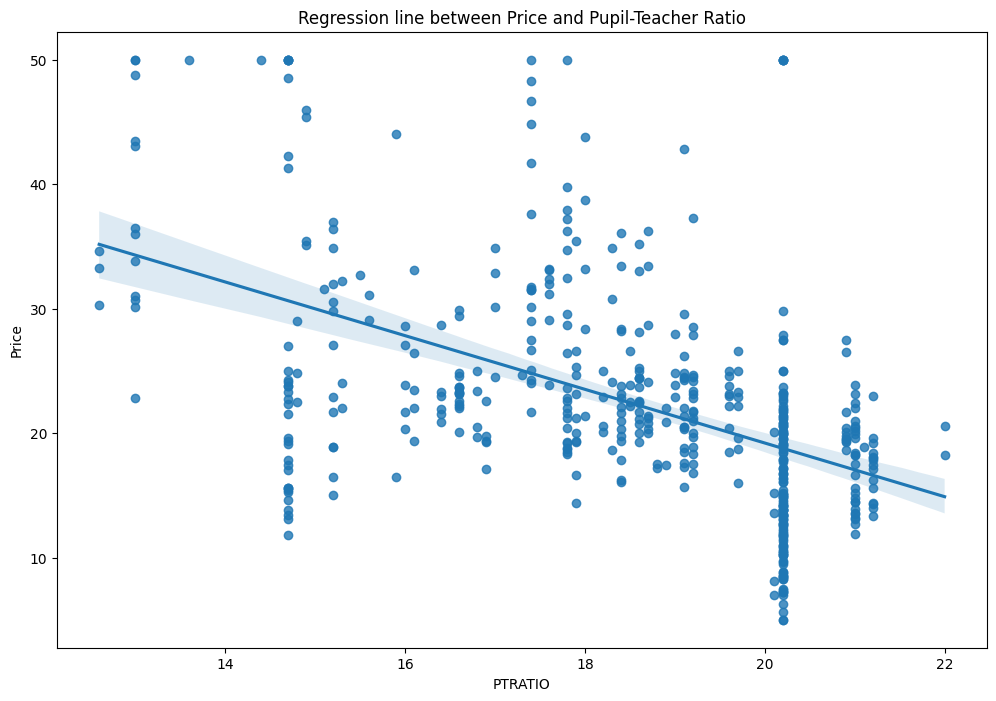

In [15]:
plt.figure(figsize=(12,8))
sns.regplot(data=boston, x='PTRATIO', y='Price')
plt.title("Regression line between Price and Pupil-Teacher Ratio")

#### Regression Line - Price vs Pupil-Teacher Ratio (PTRATIO)
This regression plot shows the relationship between house prices and the pupil-teacher ratio by town (PTRATIO). A higher pupil-teacher ratio may indicate lower quality of education, which can negatively impact house prices.

Let's dividing the dependent and independent features

In [16]:
X = boston.iloc[:, :-1] ## independent features
y = boston.iloc[:, -1]  ## dependent feature

In [17]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [18]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [20]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


## Train Test Split

The dataset is split into training and testing sets to evaluate the model's performance on unseen data. This helps prevent overfitting and ensures that the model generalizes well to new data.


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Standardize the dataset

#### Standardization
Standardization scales the features to have zero mean and unit variance. This is important for linear regression and other algorithms that use gradient descent, as it ensures all features contribute equally and helps the optimizer converge faster.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

we don't want to fit the scaler on the test data because it would introduce data leakage, means the model could perform better than it should on unseen data

In [23]:
X_train

array([[ 0.89624872, -0.51060139,  0.98278223, ...,  0.86442095,
         0.24040357,  0.77155612],
       [-0.34895881, -0.51060139, -0.44867555, ...,  1.22118698,
         0.20852839,  0.32248963],
       [-0.41764058,  0.03413008, -0.48748013, ..., -1.36536677,
         0.43481957,  0.92775316],
       ...,
       [-0.43451148,  2.97567999, -1.32968321, ..., -0.56264319,
         0.36745216, -0.90756208],
       [ 1.01703049, -0.51060139,  0.98278223, ...,  0.86442095,
        -2.80977992,  1.50233514],
       [-0.40667333, -0.51060139, -0.38831288, ...,  1.17659123,
        -3.25117205, -0.26046005]], shape=(339, 13))

In [24]:
X_test

array([[-0.42451319, -0.51060139, -1.03649306, ..., -0.74102621,
         0.41899501, -0.48220406],
       [-0.42911576,  1.2325393 , -0.6973123 , ..., -0.29506866,
         0.43481957, -1.25063772],
       [-0.42269508, -0.51060139,  2.36824941, ...,  0.8198252 ,
         0.35807046,  0.77713459],
       ...,
       [-0.33727525,  0.36096896, -1.04799071, ..., -2.34647337,
         0.38395492, -0.28556314],
       [-0.30591027, -0.51060139, -0.44867555, ...,  1.22118698,
         0.2463943 , -0.07218683],
       [-0.36872487,  0.36096896, -1.04799071, ..., -2.34647337,
         0.32133488, -0.91871901]], shape=(167, 13))

## Apply Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
print(lin_reg.coef_)

[-0.98858032  0.86793276  0.40502822  0.86183791 -1.90009974  2.80813518
 -0.35866856 -3.04553498  2.03276074 -1.36400909 -2.0825356   1.04125684
 -3.92628626]


#### Linear Regression Coefficients
The coefficients represent the change in the predicted house price for a one-unit change in each feature, assuming all other features are held constant. Positive values indicate a direct relationship, while negative values indicate an inverse relationship.


In [28]:
print(lin_reg.intercept_)

22.970796460176988



#### Linear Regression Intercept
The intercept is the predicted house price when all feature values are zero. It serves as the baseline value for the regression equation.

In [29]:
lin_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

#### Linear Regression Model Parameters
The `get_params()` method displays all the hyperparameters and configuration options used to initialize the Linear Regression model. These include settings like whether to fit the intercept, normalize the data, and the solver used. Understanding these parameters helps in tuning the model for better performance.

## Prediction on the Test Data

In [30]:
lin_reg_pred = lin_reg.predict(X_test)

#### Linear Regression Predictions
This step uses the trained Linear Regression model to predict house prices on the test set. The predictions are compared to the actual values to evaluate model performance.

In [31]:
lin_reg_pred

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

In [32]:
lin_reg.score(X_test, y_test)  # R^2 score

0.7261570836552476

#### R² Score (Coefficient of Determination)
The R² score measures how well the regression model explains the variance in the target variable. It ranges from 0 to 1, where 1 means the model perfectly predicts the target, and 0 means it does not explain any variance. Higher R² values indicate a better fit of the model to the data.

<Axes: xlabel='Price'>

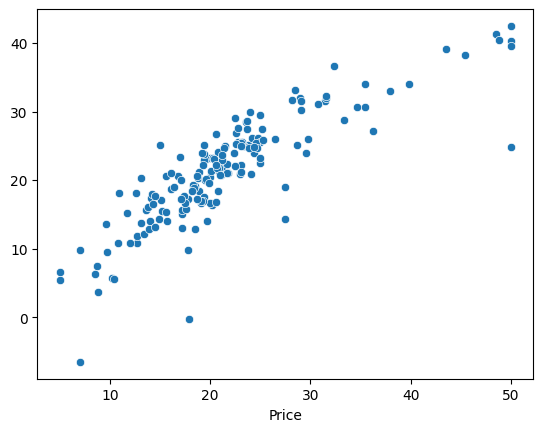

In [33]:
sns.scatterplot(x=y_test, y=lin_reg_pred)

#### Actual vs Predicted Scatter Plot
This scatter plot compares the actual house prices (y_test) to the predicted prices from the model (lin_reg_pred). If the model is accurate, the points will lie close to the diagonal line, indicating good agreement between predictions and true values.

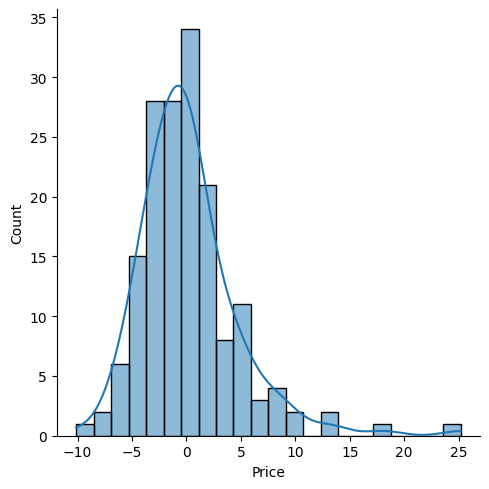

In [34]:
residuals = y_test - lin_reg_pred

sns.displot(residuals, kde=True)

#### Residuals Distribution Plot
This plot shows the distribution of residuals (the difference between actual and predicted prices). A normal, symmetric distribution centered around zero indicates that the model's errors are random and unbiased, which is a sign of a good fit.

<Axes: ylabel='Price'>

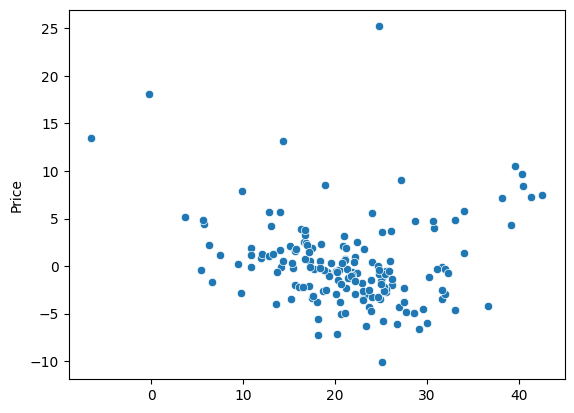

In [35]:
sns.scatterplot(x=lin_reg_pred, y=residuals)

#### Predicted Values vs Residuals Scatter Plot
This scatter plot visualizes the residuals (errors) against the predicted house prices. Ideally, the residuals should be randomly scattered around zero, showing no clear pattern. This indicates that the model's predictions are unbiased and that the model fits the data well.

### Mean Squared/Absolute Errors

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:", mean_absolute_error(y_test, lin_reg_pred))
print("Mean Squared Error:", mean_squared_error(y_test, lin_reg_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, lin_reg_pred)))

Mean Absolute Error: 3.148255754816832
Mean Squared Error: 20.724023437339753
Root Mean Squared Error: 4.552364598463062


### R Square and Adjusted R Square

Formula

<b>R^2 = 1 - SSR/SST</b>

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [40]:
from sklearn.metrics import r2_score

score = r2_score(y_test, lin_reg_pred)
print("R^2 Score:", score)

R^2 Score: 0.7261570836552476


<b>Adjusted R^2 = 1 - [(1-R^2)*(n-1)/(n-k-1)]</b>

where,

R^2: The R^2 of the model n: The number of observations k: The number of predictor variables

In [41]:
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.7028893848808568

## New Data Prediction

In [47]:
np.array(X)[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [50]:
scaler.transform(np.array(X)[0].reshape(1, -1))

array([[-0.43564324,  0.27381192, -1.28656701, -0.28821362, -0.16592705,
         0.34415812, -0.13400517,  0.15295316, -0.98016846, -0.68122373,
        -1.32077101,  0.43481957, -1.04841834]])

In [49]:
lin_reg.predict(scaler.transform(np.array(X)[0].reshape(1, -1)))

array([29.99003492])

## Pickling the Model File for Deployment

In [51]:
import pickle

# Save the model
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(lin_reg, f)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

## Load the Model

In [54]:
pickle_model = pickle.load(open("linear_regression_model.pkl", "rb"))
pickle_scaler = pickle.load(open("scaler.pkl", "rb"))

In [55]:
pickle_model.predict(pickle_scaler.transform(np.array(X)[0].reshape(1, -1)))

array([29.99003492])